In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(50,30))

In [11]:
data = pd.read_csv("data/civic data.csv", parse_dates= [2,4])

In [12]:
ls=[]
for i in range(15,23):
    ls.append(data.columns.values[i])
ls

['Start Location Lat',
 'Start Location Lon',
 'Start Location Accuracy (meters)',
 'End Location Lat',
 'End Location Lon',
 'End Location Accuracy (meters)',
 'Path',
 'Tags']

In [13]:
data = data.drop(['Start Location Lat', 'Start Location Lon', 'Start Location Accuracy (meters)', 'End Location Lat', 'End Location Lon', 'End Location Accuracy (meters)', 'Path'], axis=1)

In [14]:
data.loc[(data['Start Location Name'].str.contains('Mountain Road')==True)|(data['Start Location Name'].str.contains('East Pecos Road, Mesa, AZ 85212, USA ')==True)
         ,'Start Location Name'] ='Work'
data.loc[(data['Start Location Name'].str.contains('Mesquite')==True) |(data['Start Location Name'].str.contains('Ironwood')==True)
         ,'Start Location Name'] ='Home'
data.loc[(data['End Location Name'].str.contains('Mountain Road')==True)|(data['End Location Name'].str.contains('East Pecos Road, Mesa, AZ 85212, USA ')==True)
         ,'End Location Name'] ='Work'
data.loc[data['End Location Name'].str.contains('Mountain Road')==True,'End Location Name'] ='Work'
data.loc[(data['End Location Name'].str.contains('Mesquite')==True) |(data['End Location Name'].str.contains('Ironwood')==True)
         ,'End Location Name'] ='Home'



In [15]:

date = pd.Series([pd.Timestamp.date(x) for x in data['Start Time']], index=data.index)
data.loc[:, 'date'] = date
data= data.set_index('date', drop=False)

commute_mask = (data['Start Location Name'] =='Home') & (data['End Location Name'] =='Work')|(data['End Location Name'] =='Home') & (data['Start Location Name'] =='Work')
data.loc[commute_mask, 'Tags'] = 'commute'
data.Tags = data.Tags.fillna('Other')

In [16]:



hour = pd.Series([x.hour for x in data['Start Time']], index=data.index)
data.loc[:, 'hour'] = hour




day_dict={0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

dayofweek2 = pd.Series([day_dict[x.dayofweek] for x in data['Start Time']], index=data.index)
data.loc[:, 'day of week'] = dayofweek2


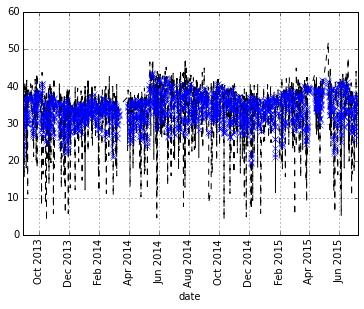

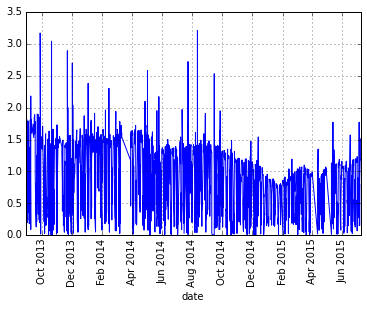

In [17]:
data['Average MPG'].plot(rot=90, style = 'k--')
pd.rolling_mean(data['Average MPG'], 5).plot(rot = 90, style= 'x')

plt.show()
data['Fuel Cost (USD)'].plot(rot=90)

plt.show()

In [18]:
data.head()

,Vehicle,Start Location Name,Start Time,End Location Name,End Time,Distance (mi),Duration (min),Fuel Cost (USD),Average MPG,Fuel Volume (gal),Hard Accelerations,Hard Brakes,Duration Over 70 mph (secs),Duration Over 75 mph (secs),Duration Over 80 mph (secs),Tags,date,hour,day of week
date,,,,,,,,,,,,,,,,,,,
2015-07-08,2003 Honda Civic,Work,2015-07-08 17:32:00,Home,2015-07-08 18:07:00,19.22,34.73,1.51,34.34,0.55,1,0,0,0,0,commute,2015-07-08,17,Wed
2015-07-08,2003 Honda Civic,Home,2015-07-08 06:28:00,Work,2015-07-08 06:52:00,15.52,24.36,1.18,35.52,0.45,0,0,14,0,0,commute,2015-07-08,6,Wed
2015-07-07,2003 Honda Civic,Work,2015-07-07 17:44:00,Home,2015-07-07 18:10:00,15.63,25.62,1.18,35.75,0.45,0,0,191,0,0,commute,2015-07-07,17,Tue
2015-07-07,2003 Honda Civic,Home,2015-07-07 06:30:00,Work,2015-07-07 06:53:00,15.53,23.02,1.15,36.46,0.42,0,0,35,0,0,commute,2015-07-07,6,Tue
2015-07-06,2003 Honda Civic,"1586-1598 East Warner Road, Gilbert, AZ 85296,...",2015-07-06 17:39:00,"1495 East Warner Road, Gilbert, AZ 85296, USA",2015-07-06 17:43:00,2.16,4.75,0.15,39.05,0.05,0,0,0,0,0,Other,2015-07-06,17,Mon


In [49]:
kind= data.groupby(['Tags','day of week'])
kind['Distance (mi)'].mean()


Tags     day of week
Other    Fri             6.511967
         Mon             9.546795
         Sat             6.564847
         Sun             8.611587
         Thurs           5.966989
         Tue             7.965507
         Wed             9.054545
commute  Fri            15.546667
         Mon            15.685638
         Sun            15.700845
         Thurs          15.642000
         Tue            15.842692
         Wed            15.624545
Name: Distance (mi), dtype: float64

In [93]:
j = kind['Distance (mi)'].count().unstack(0)
j.commute= j.commute.fillna(0)
j


Tags,Other,commute
day of week,,
Fri,366,3
Mon,78,149
Sat,295,0
Sun,63,142
Thurs,362,5
Tue,69,156
Wed,88,143


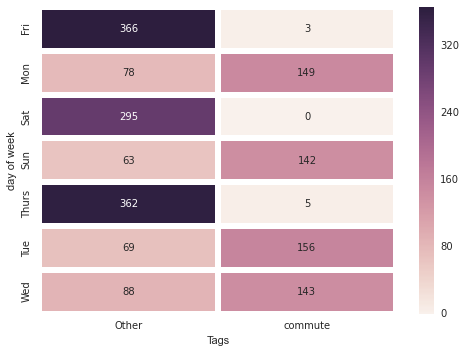

In [96]:

import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)

ax = sns.heatmap(j, linewidth=5, annot=True ,fmt=".0f" )